In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### For Q1 to Q5 you will be using the iris.data file, it is basically a csv file

In [2]:
# Q1. Create a dataframe from iris.data, using the appropriate column names
# 'sepal_length','sepal_width', 'petal_length', 'petal_width', 'class' (10 points)

In [3]:
iris = pd.read_csv('iris.data')
df = pd.DataFrame(iris)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
# Q2. Check if there is any NaN in this dataframe (5 points)

In [5]:
df.isnull().values.any()

False

In [6]:
# Q3. Change the values from row 30 to row 60 of column petal_width to NaN. (5 points)

In [7]:
df.loc[30:60,'petal_width':'petal_width'] = np.nan
print(df.loc[30:60])

    sepal_length  sepal_width  petal_length  petal_width            class
30           5.4          3.4           1.5          NaN      Iris-setosa
31           5.2          4.1           1.5          NaN      Iris-setosa
32           5.5          4.2           1.4          NaN      Iris-setosa
33           4.9          3.1           1.5          NaN      Iris-setosa
34           5.0          3.2           1.2          NaN      Iris-setosa
35           5.5          3.5           1.3          NaN      Iris-setosa
36           4.9          3.1           1.5          NaN      Iris-setosa
37           4.4          3.0           1.3          NaN      Iris-setosa
38           5.1          3.4           1.5          NaN      Iris-setosa
39           5.0          3.5           1.3          NaN      Iris-setosa
40           4.5          2.3           1.3          NaN      Iris-setosa
41           4.4          3.2           1.3          NaN      Iris-setosa
42           5.0          3.5         

In [8]:
# Q4. Replace NaN values with value 3.0 (5 points)

In [9]:
df = df.replace(np.nan, 3)
print(df.loc[30:60])

    sepal_length  sepal_width  petal_length  petal_width            class
30           5.4          3.4           1.5          3.0      Iris-setosa
31           5.2          4.1           1.5          3.0      Iris-setosa
32           5.5          4.2           1.4          3.0      Iris-setosa
33           4.9          3.1           1.5          3.0      Iris-setosa
34           5.0          3.2           1.2          3.0      Iris-setosa
35           5.5          3.5           1.3          3.0      Iris-setosa
36           4.9          3.1           1.5          3.0      Iris-setosa
37           4.4          3.0           1.3          3.0      Iris-setosa
38           5.1          3.4           1.5          3.0      Iris-setosa
39           5.0          3.5           1.3          3.0      Iris-setosa
40           4.5          2.3           1.3          3.0      Iris-setosa
41           4.4          3.2           1.3          3.0      Iris-setosa
42           5.0          3.5         

In [10]:
# Q5. Create a new dataframe with the class column deleted (5 points)

In [11]:
newdf = df.drop('class', 1)
newdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


### For Q6 to Q9, you will be using the us-counties.csv file
 
us-counties.csv contains Covid-19 Data in the United States from 2020-01-21 to 2020-04-19

fips is an unique state identifier, cases are accumulated cases, deaths are accumulated deaths

In [12]:
data  = pd.read_csv("us-counties.csv")

In [13]:
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [14]:
# Q6 Data pre-processing
# - Create a new dataframe, which uses DatetimeIndex, 
# - Convert the data type of fips (a unqiue state identifier), cases, death to integer 
# (15 points)

In [15]:
data['date'] = pd.to_datetime(data['date'])
new_data = data.set_index('date')
new_data[['fips','cases','deaths']] = new_data[['fips','cases','deaths']].apply(pd.to_numeric)
new_data.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0
2020-01-22,Snohomish,Washington,53061.0,1,0
2020-01-23,Snohomish,Washington,53061.0,1,0
2020-01-24,Cook,Illinois,17031.0,1,0
2020-01-24,Snohomish,Washington,53061.0,1,0


In [16]:
# Q7 Add two new columns
#  ratio - which is the ratio of death / cases
#  new cases - new cases for that day
# (15 points)

In [17]:
new_data['ratio']= new_data['deaths'] / new_data['cases']
#print(new_data.sort_values(['county']))
new_data1 = new_data.sort_values(['county', 'state', 'cases'])
new_data1['new cases'] = new_data1.filter(['county','state', 'cases']).groupby(['county','state']).cases.diff()
new_data1 = new_data1.replace(np.nan, 0)
print(new_data1[30:70])


               county           state     fips  cases  deaths     ratio  \
date                                                                      
2020-04-18  Abbeville  South Carolina  45001.0     15       0  0.000000   
2020-04-19  Abbeville  South Carolina  45001.0     17       0  0.000000   
2020-03-22     Acadia       Louisiana  22001.0      1       0  0.000000   
2020-03-23     Acadia       Louisiana  22001.0      1       0  0.000000   
2020-03-24     Acadia       Louisiana  22001.0      2       0  0.000000   
2020-03-25     Acadia       Louisiana  22001.0      2       0  0.000000   
2020-03-26     Acadia       Louisiana  22001.0      3       0  0.000000   
2020-03-27     Acadia       Louisiana  22001.0      8       1  0.125000   
2020-03-28     Acadia       Louisiana  22001.0      9       1  0.111111   
2020-03-29     Acadia       Louisiana  22001.0      9       1  0.111111   
2020-03-30     Acadia       Louisiana  22001.0     11       1  0.090909   
2020-03-31     Acadia    

In [18]:
# Q8 Get the number of new cases for different States for Febuaray (from 2020-2-1 to 2020-2-29)
# for those states that do not have new cases,  fill in 0 instead (20 points)

In [19]:
a = new_data[0:39].drop_duplicates().groupby(['county','state'])['cases'].max()
b = new_data[39:398].drop_duplicates().groupby(['county','state'])['cases'].max()
a1 = a.to_frame().groupby(['state'])['cases'].sum()
b1 = b.to_frame().groupby(['state'])['cases'].sum()
new_cases = b1 #new cases for states that have 0 zero cases in January

if b1.index.any() == 'California':
    new_cases1 = b1 - a1
    new_cases1.fillna(0, inplace=True)
elif b1.index.any() == 'Washington':
    new_cases1 = b1 - a1
    new_cases.fillna(0, inplace=True)
elif b1.index.any() == 'Arizona':
    new_cases1 = b1 - a1
    new_cases1.fillna(0, inplace=True)
elif b1.index.any() == 'Illinois':
    new_cases1 = b1 - a1 #new cases for states that cases in January 
    new_cases1.fillna(0, inplace=True)


true_new_cases = new_cases1 + new_cases
true_new_cases = true_new_cases.to_frame()
true_new_cases = true_new_cases.replace(to_replace =53,value =25)
true_new_cases = true_new_cases.replace(to_replace =4,value =1)
true_new_cases = true_new_cases.replace(to_replace =19,value =9)
true_new_cases.loc['Arizona', 'cases'] = 0 
print(true_new_cases)

               cases
state               
Arizona          0.0
California      25.0
Illinois         1.0
Massachusetts    1.0
Nebraska        13.0
Oregon           1.0
Texas           11.0
Utah             1.0
Washington       9.0
Wisconsin        1.0


In [20]:
# Q9 Create a function plot_states([state1, state2, ...]), this function takes a list of 
# state names and plot the accumulated cases for those states within the same plot (20 points)

['Colorado', 'Idaho', 'wyoming', 'Texas', 'new york', 'michigan']


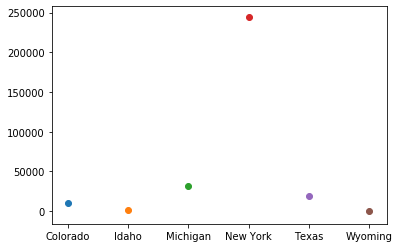

In [21]:
total_cases_per_state = new_data1.groupby(['county','state']).cases.max()
total_cases_per_state = total_cases_per_state.to_frame()

def plot_states(list):
    
    state = total_cases_per_state.groupby(['state']).cases.sum()
    if 'Arizona' in list:
            ari = state.index[2:3]
            ari_cases = state.loc['Arizona']
            plt.scatter(ari, ari_cases)
    if 'arizona' in list:
            ari = state.index[2:3]
            ari_cases = state.loc['Arizona']
            plt.scatter(ari, ari_cases)
    if 'California' in list:
            x = state.index[4:5]
            y = state.loc['California']
            plt.scatter(x, y)
    if 'california' in list:
            x = state.index[4:5]
            y = state.loc['California']
            plt.scatter(x, y)
    if 'Arkansas' in list:
            ar = state.index[3:4]
            ar_cases = state.loc['Arkansas']
            plt.scatter(ar, ar_cases)
    if 'arkansas' in list:
            ar = state.index[3:4]
            ar_cases = state.loc['Arkansas']
            plt.scatter(ar, ar_cases)
    if 'Alabama' in list:
            alibama = state.index[0:1]
            alibama_cases = state.loc['Alabama']
            plt.scatter(alibama, alibama_cases)
    if 'alabama' in list:
            alibama = state.index[0:1]
            alibama_cases = state.loc['Alabama']
            plt.scatter(alibama, alibama_cases)
    if 'Alaska' in list:
            alaska = state.index[1:2]
            alaska_cases = state.loc['Alaska']
            plt.scatter(alaska, alaska_cases)
    if 'alaska' in list:
            alaska = state.index[1:2]
            alaska_cases = state.loc['Alaska']
            plt.scatter(alaska, alaska_cases)
    if 'Colorado' in list:
            colo = state.index[5:6]
            colo_cases = state.loc['Colorado']
            plt.scatter(colo, colo_cases)
    if 'colorado' in list:
            colo = state.index[5:6]
            colo_cases = state.loc['Colorado']
            plt.scatter(colo, colo_cases)
    if 'Connecticut' in list:
            con = state.index[6:7]
            con_cases = state.loc['Connecticut']
            plt.scatter(con, con_cases)
    if 'connecticut' in list:
            con = state.index[6:7]
            con_cases = state.loc['Connecticut']
            plt.scatter(con, con_cases)
    if 'Delaware' in list:
            dela = state.index[7:8]
            dela_cases = state.loc['Delaware']
            plt.scatter(dela, dela_cases)
    if 'delaware' in list:
            dela = state.index[7:8]
            dela_cases = state.loc['Delaware']
            plt.scatter(dela, dela_cases)
    if 'District of Columbia' in list:
            Dis = state.index[8:9]
            Dis_cases = state.loc['District of Columbia']
            plt.scatter(dis, dis_cases)
    if 'district of columbia' in list:
            Dis = state.index[8:9]
            Dis_cases = state.loc['District of Columbia']
            plt.scatter(dis, dis_cases)
    if 'FLorida' in list:
            flo = state.index[9:10]
            flo_cases = state.loc['Florida']
            plt.scatter(flo, flo_cases)
    if 'fLorida' in list:
            flo = state.index[9:10]
            flo_cases = state.loc['Florida']
            plt.scatter(flo, flo_cases)
    if 'Georgia' in list:
            geo = state.index[10:11]
            geo_cases = state.loc['Georgia']
            plt.scatter(geo, geo_cases)
    if 'georgia' in list:
            geo = state.index[10:11]
            geo_cases = state.loc['Georgia']
            plt.scatter(geo, geo_cases)
    if 'Guam' in list:
            guam = state.index[11:12]
            guam_cases = state.loc['Guam']
            plt.scatter(guam, guam_cases)
    if 'guam' in list:
            guam = state.index[11:12]
            guam_cases = state.loc['Guam']
            plt.scatter(guam, guam_cases)
    if 'Hawaii' in list:
            hawaii = state.index[12:13]
            hawaii_cases = state.loc['Hawaii']
            plt.scatter(hawaii, hawaii_cases)
    if 'hawaii' in list:
            hawaii = state.index[12:13]
            hawaii_cases = state.loc['Hawaii']
            plt.scatter(hawaii, hawaii_cases)
    if 'Idaho' in list:
            ida = state.index[13:14]
            id_cases = state.loc['Idaho']
            plt.scatter(ida, id_cases)
    if 'idaho' in list:
            ida = state.index[13:14]
            id_cases = state.loc['Idaho']
            plt.scatter(ida, id_cases)
    if 'Illinois' in list:
            ill = state.index[14:15]
            ill_cases = state.loc['Illinois']
            plt.scatter(ill, ill_cases)
    if 'illinois' in list:
            ill = state.index[14:15]
            ill_cases = state.loc['Illinois']
            plt.scatter(ill, ill_cases)
    if 'Indiana' in list:
            indiana = state.index[15:16]
            indiana_cases = state.loc['Indiana']
            plt.scatter(indiana, indiana_cases)
    if 'indiana' in list:
            indiana = state.index[15:16]
            indiana_cases = state.loc['Indiana']
            plt.scatter(indiana, indiana_cases)
    if 'Iowa' in list:
            iowa = state.index[16:17]
            iowa_cases = state.loc['Iowa']
            plt.scatter(iowa, iowa_cases)
    if 'iowa' in list:
            iowa = state.index[16:17]
            iowa_cases = state.loc['Iowa']
            plt.scatter(iowa, iowa_cases)
    if 'Kansas' in list:
            kan = state.index[17:18]
            kan_cases = state.loc['Kansas']
            plt.scatter(kan, kan_cases)
    if 'kansas' in list:
            kan = state.index[17:18]
            kan_cases = state.loc['Kansas']
            plt.scatter(kan, kan_cases)
    if 'Kentucky' in list:
            ken = state.index[18:19]
            ken_cases = state.loc['Kentucky']
            plt.scatter(ken, ken_cases)
    if 'kentucky' in list:
            ken = state.index[18:19]
            ken_cases = state.loc['Kentucky']
            plt.scatter(ken, ken_cases)
    if 'Louisiana' in list:
            louis = state.index[19:20]
            louis_cases = state.loc['Louisiana']
            plt.scatter(louis, louis_cases)
    if 'louisiana' in list:
            louis = state.index[19:20]
            louis_cases = state.loc['Louisiana']
            plt.scatter(louis, louis_cases)
    if 'Maine' in list:
            maine = state.index[20:21]
            maine_cases = state.loc['Maine']
            plt.scatter(maine, maine_cases)
    if 'maine' in list:
            maine = state.index[20:21]
            maine_cases = state.loc['Maine']
            plt.scatter(maine, maine_cases)
    if 'Maryland' in list:
            mary = state.index[21:22]
            mary_cases = state.loc['Maryland']
            plt.scatter(mary, mary_cases)
    if 'maryland' in list:
            mary = state.index[21:22]
            mary_cases = state.loc['Maryland']
            plt.scatter(mary, mary_cases)
    if 'Massachusetts' in list:
            ma = state.index[22:23]
            ma_cases = state.loc['Massachusetts']
            plt.scatter(ma, ma_cases)
    if 'massachusetts' in list:
            ma = state.index[22:23]
            ma_cases = state.loc['Massachusetts']
            plt.scatter(ma, ma_cases)
    if 'Michigan' in list:
            mich = state.index[23:24]
            mich_cases = state.loc['Michigan']
            plt.scatter(mich, mich_cases)
    if 'michigan' in list:
            mich = state.index[23:24]
            mich_cases = state.loc['Michigan']
            plt.scatter(mich, mich_cases)
    if 'Minnesota' in list:
            minne = state.index[24:25]
            minne_cases = state.loc['Minnesota']
            plt.scatter(minne, minne_cases)
    if 'minnesota' in list:
            minne = state.index[24:25]
            minne_cases = state.loc['Minnesota']
            plt.scatter(minne, minne_cases)
    if 'Mississippi' in list:
            ippi = state.index[25:26]
            ippi_cases = state.loc['Mississippi']
            plt.scatter(ippi, ippi_cases)
    if 'mississippi' in list:
            ippi = state.index[25:26]
            ippi_cases = state.loc['Mississippi']
            plt.scatter(ippi, ippi_cases)
    if 'Missouri' in list:
            ouri = state.index[26:27]
            ouri_cases = state.loc['Missouri']
            plt.scatter(ouri, ouri_cases)  
    if 'missouri' in list:
            ouri = state.index[26:27]
            ouri_cases = state.loc['Missouri']
            plt.scatter(ouri, ouri_cases)
    if 'Montana' in list:
            tana = state.index[27:28]
            tana_cases = state.loc['Montana']
            plt.scatter(tana, tana_cases)
    if 'montana' in list:
            tana = state.index[27:28]
            tana_cases = state.loc['Montana']
            plt.scatter(tana, tana_cases)
    if 'Nebraska' in list:
            neb = state.index[28:29]
            neb_cases = state.loc['Nebraska']
            plt.scatter(neb, neb_cases)
    if 'nebraska' in list:
            neb = state.index[28:29]
            neb_cases = state.loc['Nebraska']
            plt.scatter(neb, neb_cases)
    if 'Neveda' in list:
            neve = state.index[29:30]
            neve_cases = state.loc['Neveda']
            plt.scatter(neve, neve_cases)
    if 'neveda' in list:
            neve = state.index[29:30]
            neve_cases = state.loc['Neveda']
            plt.scatter(neve, neve_cases)
    if 'New Hampshire' in list:
            shire = state.index[30:31]
            shire_cases = state.loc['New Hampshire']
            plt.scatter(shire, shire_cases)
    if 'new hampshire' in list:
            shire = state.index[30:31]
            shire_cases = state.loc['New Hampshire']
            plt.scatter(shire, shire_cases)
    if 'New Jersey' in list:
            poop = state.index[31:32]
            poop_cases = state.loc['New Jersey']
            plt.scatter(poop, poop_cases)
    if 'new jersey' in list:
            poop = state.index[31:32]
            poop_cases = state.loc['New Jersey']
            plt.scatter(poop, poop_cases)
    if 'New Mexico' in list:
            mex = state.index[32:33]
            mex_cases = state.loc['New Mexico']
            plt.scatter(mex, mex_cases)
    if 'new mexico' in list:
            mex = state.index[32:33]
            mex_cases = state.loc['New Mexico']
            plt.scatter(mex, mex_cases)
    if 'New York' in list:
            goat = state.index[33:34]
            goat_cases = state.loc['New York']
            plt.scatter(goat, goat_cases)
    if 'new york' in list:
            goat = state.index[33:34]
            goat_cases = state.loc['New York']
            plt.scatter(goat, goat_cases)
    if 'North Carolina' in list:
            caro = state.index[34:35]
            caro_cases = state.loc['North Carolina']
            plt.scatter(caro, caro_cases)
    if 'north carolina' in list:
            caro = state.index[34:35]
            caro_cases = state.loc['North Carolina']
            plt.scatter(caro, caro_cases)
    if 'North Dakota' in list:
            nd = state.index[35:36]
            nd_cases = state.loc['North Dakota']
            plt.scatter(nd, nd_cases)
    if 'north dakota' in list:
            nd = state.index[35:36]
            nd_cases = state.loc['North Dakota']
            plt.scatter(nd, nd_cases)
    if 'Northern Mariana Islands' in list:
            isle = state.index[36:37]
            isle_cases = state.loc['Northern Mariana Islands']
            plt.scatter(isle, isle_cases)
    if 'northern mariana islands' in list:
            isle = state.index[36:37]
            isle_cases = state.loc['Northern Mariana Islands']
            plt.scatter(isle, isle_cases)
    if 'Ohio' in list:
            ohio = state.index[37:38]
            ohio_cases = state.loc['Ohio']
            plt.scatter(ohio, ohio_cases)
    if 'ohio' in list:
            ohio = state.index[37:38]
            ohio_cases = state.loc['Ohio']
            plt.scatter(ohio, ohio_cases)
    if 'Oklahoma' in list:
            homa = state.index[38:39]
            homa_cases = state.loc['Oklahoma']
            plt.scatter(homa, homa_cases)
    if 'oklahoma' in list:
            homa = state.index[38:39]
            homa_cases = state.loc['Oklahoma']
            plt.scatter(homa, homa_cases)
    if 'Oregon' in list:
            gon = state.index[39:40]
            gon_cases = state.loc['Oregon']
            plt.scatter(gon, gon_cases)
    if 'oregon' in list:
            gon = state.index[39:40]
            gon_cases = state.loc['Oregon']
            plt.scatter(gon, gon_cases)
    if 'Pennsylvania' in list:
            pennsylvania = state.index[40:41]
            pennsylvania_cases = state.loc['Pennsylvania']
            plt.scatter(pennsylvania, pennsylvania_cases)
    if 'pennsylvania' in list:
            pennsylvania = state.index[40:41]
            pennsylvania_cases = state.loc['Pennsylvania']
            plt.scatter(pennsylvania, pennsylvania_cases)
    if 'Puerto Rico' in list:
            rico = state.index[41:42]
            rico_cases = state.loc['Puerto Rico']
            plt.scatter(rico, rico_cases)
    if 'puerto rico' in list:
            rico = state.index[41:42]
            rico_cases = state.loc['Puerto Rico']
            plt.scatter(rico, rico_cases)
    if 'Rhode Island' in list:
            rhode = state.index[42:43]
            rhode_cases = state.loc['Rhode Island']
            plt.scatter(rhode, rhode_cases)
    if 'rhode island' in list:
            rhode = state.index[42:43]
            rhode_cases = state.loc['Rhode Island']
            plt.scatter(rhode, rhode_cases)
    if 'South Carolina' in list:
            lina = state.index[43:44]
            lina_cases = state.loc['South Carolina']
            plt.scatter(lina, lina_cases)
    if 'south carolina' in list:
            lina = state.index[43:44]
            lina_cases = state.loc['South Carolina']
            plt.scatter(lina, lina_cases)
    if 'South Dakota' in list:
            south = state.index[44:45]
            south_cases = state.loc['South Dakota']
            plt.scatter(south, south_cases)
    if 'south dakota' in list:
            south = state.index[44:45]
            south_cases = state.loc['South Dakota']
            plt.scatter(south, south_cases)
    if 'Tennessee' in list:
            ten = state.index[45:46]
            ten_cases = state.loc['Tennessee']
            plt.scatter(ten, ten_cases)
    if 'tennessee' in list:
            ten = state.index[45:46]
            ten_cases = state.loc['Tennessee']
            plt.scatter(ten, ten_cases)
    if 'Texas' in list:
            tex = state.index[46:47]
            tex_cases = state.loc['Texas']
            plt.scatter(tex, tex_cases)
    if 'texas' in list:
            tex = state.index[46:47]
            tex_cases = state.loc['Texas']
            plt.scatter(tex, tex_cases)
    if 'Utah' in list:
            utah = state.index[47:48]
            utah_cases = state.loc['Utah']
            plt.scatter(utah, utah_cases)
    if 'utah' in list:
            utah = state.index[47:48]
            utah_cases = state.loc['Utah']
            plt.scatter(utah, utah_cases)
    if 'Vermont' in list:
            ver = state.index[48:49]
            ver_cases = state.loc['Vermont']
            plt.scatter(ver, ver_cases)
    if 'vermont' in list:
            ver = state.index[48:49]
            ver_cases = state.loc['Vermont']
            plt.scatter(ver, ver_cases)
    if 'Virgin Islands' in list:
            virgin = state.index[49:50]
            virgin_cases = state.loc['Virgin Islands']
            plt.scatter(virgin, virgin_cases)
    if 'virgin islands' in list:
            virgin = state.index[49:50]
            virgin_cases = state.loc['Virgin Islands']
            plt.scatter(virgin, virgin_cases)
    if 'Virginia' in list:
            president = state.index[50:51]
            president_cases = state.loc['Virginia']
            plt.scatter(president, president_cases)
    if 'virginia' in list:
            president = state.index[50:51]
            president_cases = state.loc['Virginia']
            plt.scatter(president, president_cases)
    if 'Washington' in list:
            ing = state.index[51:52]
            ing_cases = state.loc['Washington']
            plt.scatter(ing, ing_cases)
    if 'washington' in list:
            ing = state.index[51:52]
            ing_cases = state.loc['Washington']
            plt.scatter(ing, ing_cases)
    if 'West Virginia' in list:
            west = state.index[52:53]
            west_cases = state.loc['West Virginia']
            plt.scatter(west, west_cases)
    if 'west virginia' in list:
            west = state.index[52:53]
            west_cases = state.loc['West Virginia']
            plt.scatter(west, west_cases)
    if 'Wisconsin' in list:
            cheese = state.index[53:54]
            cheese_cases = state.loc['Wisconsin']
            plt.scatter(cheese, cheese_cases)
    if 'wisconsin' in list:
            cheese = state.index[53:54]
            cheese_cases = state.loc['Wisconsin']
            plt.scatter(cheese, cheese_cases)
    if 'Wyoming' in list:
            wyoming = state.index[54:55]
            wyoming_cases = state.loc['Wyoming']
            plt.scatter(wyoming, wyoming_cases)
    if 'wyoming' in list:
            wyoming = state.index[54:55]
            wyoming_cases = state.loc['Wyoming']
            plt.scatter(wyoming, wyoming_cases)
    return list
   
print(plot_states(['Colorado', 'Idaho', 'wyoming', 'Texas', 'new york', 'michigan']))